## Exercise Set 1 for OSM 

### Dynamic Programming with John Stachurski

This notebook contains the first set of exercises for the [OSM](https://bfi.uchicago.edu/osm) bootcamp dynamic programming section.

We will use the following libraries:

In [74]:
import numpy as np
import matplotlib.pyplot as plt

### Exercise 1

Consider the data

In [49]:
A = [[0.6, 0.1, -0.3],
     [0.5, -0.4, 0.2],
     [1.0, -0.2, 1.1]]

b = [12,10,-1]

A, b = map(np.asarray, (A, b))

The equation $x = A x + b$ has a unique solution in $\mathbb R^3$.  Show that this is true by checking the spectral radius condition.

In [3]:
from scipy.linalg import eigvals, solve
evs = eigvals(A)
ρ = max(abs(evs))
print(ρ)

#If the max eigenvalue is <1, then there is a unique solution

0.965538166352


Compute the solution using both successive approximations --- that is,

$$ x_{t+1} = A x_t + b $$

and matrix algebra.

In [51]:
#Successive approximations 

x1 = np.ones(3)

equal = False

while (equal == False):
    x2 = np.dot(A,x1) + b
    if np.allclose(x1,x2):
        equal = True
    else:
        x1 = x2

print("Successive Approximation Method:")
print(x2)
    
#Matrix Algebra Method

I = np.identity(3)
x = np.linalg.inv(I-A)@b
print("Matrix Algebra Method:")
print(x)

Successive Approximation Method:
[ -0.89527045  13.34334374  45.64170355]
Matrix Algebra Method:
[ -0.89552239  13.34328358  45.64179104]


### Exercise 2

In a standard job search model, an agent 


* receives offer $w_t$ in period $t$ where $\{w_t\}$ is  iid
* accepts this offer at time $t$ or remains unemployed
    *  if remains unemployed, then receives compensation $c > 0$
    * if accepts, then works indefinitely at this wage

The agent discounts the future at rate $\beta \in (0, 1)$


It can be shown that the following is an optimal strategy: 

* Set a reservation wage $\bar w$
* Accept the first offer $w_t$ such that $w_t \geq \bar w$


It can also be shown (details omitted) that $\bar w$ should satisfy

$$
    \bar w
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, \bar w
    \right\}
    \, p_k
$$

Here 

* $w_1, \ldots, w_K$ are the possible wage values, occuring with probabilities $p_1, \ldots, p_K$
* $c > 0$

Does there always exists a $x \in [0, \infty)$ that solves the equation
$$
    x
    = c (1-\beta) + \beta
    \sum_{k=1}^K \max \left\{
        w_k ,\, x
    \right\}
    \, p_k
$$
Is it unique?  Suggest a strategy for computing it

#### Hints

There are different ways to show this, but I found the following facts useful:

*  If $x_1, \ldots, x_K$ are any $K$ numbers, then

$$ \left| \sum_{k=1}^K x_k \right| \leq \sum_{k=1}^K |x_k| $$

* For any $a, x, y$ in $\mathbb R$, 
    
$$ 
    \left| 
            \max \left\{ a,\, x \right\} - \max \left\{ a,\, y \right\} 
        \right|
        \leq | x - y |
$$


You can convince yourself of the second inequality by sketching and checking different cases...

### Answer:

To show existence of a solution, we want to show that that there exists a fixed point for the function on the right hand side of the equation. 

In order to show that there exists a fixed point, we want to use Banach's Fixed Point Theorem. We want to first show that the equation on the right is a contraction map. 

$$\begin{align*}\bigg| c(1-\beta) + \beta \sum^{K}_{k=1} max\{W_k,x\}Pk - c(1-\beta) - \beta \sum^{K}_{k=1} max\{W_k,y\}Pk \bigg| &= \beta \bigg| \sum^{K}_{k=1} max\{W_k,x\}Pk - \sum^{K}_{k=1} max\{W_k,y\}Pk \bigg| \\
&= \beta \bigg| \sum^{K}_{k=1} max\{W_k,x\} - max\{W_k,y\}Pk \bigg|\\
& \leq \beta  \sum^{K}_{k=1}\bigg| max\{W_k,x\} - max\{W_k,y\}\bigg| * \bigg|Pk \bigg| \\
& \leq \sum^{K}_{k=1} |x-y||P_k| \\
& = \beta |x-y| \sum^{K}_{k=1} |P_k|\\ 
&= \beta |x-y|
\end{align*}
$$

Since $\beta<1$, this function is a contraction map. Also, any sequence is Cauchy meaning that the metric is complete. Thus, we have a unique fixed point. Since we have a fixed point, there exists a solution for the equation above.

We can use a method of successive approximations like in exercise 1.


### Exercise 3

Let 

* $\beta = 0.96$
* $(w_1, w_2, w_3) = (0.5, 1.0, 1.5)$
* $(p_1, p_2, p_3) = (0.2, 0.4, 0.4)$

Compute and plot the reservation wage for unemployment compensation values

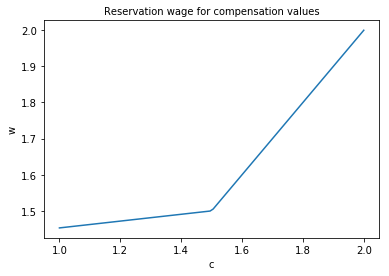

In [79]:
c_vals = np.linspace(1, 2, 100)

w = 15
b = 0.96
wage_array = np.array([0.5, 1.0, 1.5])
prob_array = np.array([0.2, 0.4, 0.4])

w_vals = np.zeros(100)
    
for i in range (0, len(c_vals)):
    c = c_vals[i]
    max_wage_array = np.zeros(3)
        
    equal = False

    while (equal == False):
        
        for j in range (0, len(wage_array)):
            max_wage = max(w, wage_array[j])
            max_wage_array[j] = max_wage
            
        wage2 = c * (1 - b) + b * max_wage_array.T @ prob_array
    
        if wage2 == w:
            equal = True
        else:
            w = wage2
    
    w_vals[i] = w
    
plt.plot(c_vals, w_vals)
plt.title('Reservation wage for compensation values', fontsize=10)
plt.xlabel(r'c')
plt.ylabel(r'w')
plt.show()

Is the reservation wage increasing or decreasing in this value?  Does that coincide with your intuition?

The reservation wage is increasing in value. This coincides with the intuition that as compensation values increase, the reservation wage should increase as people are less likely to accept a lower wage if their unemployment compensation is so high.